Summary Statistics:
Ticker_Symbol          BKR           BP          BPT          CEO         CHK  \
count          1656.000000  6102.000000  6102.000000  5769.000000  749.000000   
mean             26.618351    45.197347    45.982861   121.819062   76.127951   
std               6.446966    12.513013    36.513427    56.735817   16.706182   
min               9.330000    14.900000     1.270000    15.700000   41.600000   
25%              22.420000    36.930000    13.712500    84.090000   62.750000   
50%              26.300000    43.020000    29.210000   121.760000   79.980000   
75%              32.030000    52.430000    77.130000   164.830000   87.950000   
max              38.720000    79.700000   130.600000   270.640000  104.750000   

Ticker_Symbol         COP          CVX          DIA          DVN            E  \
count          6102.00000  6102.000000  6102.000000  6102.000000  6102.000000   
mean             64.73234    97.922379   170.639041    53.163095    51.628358   
std    

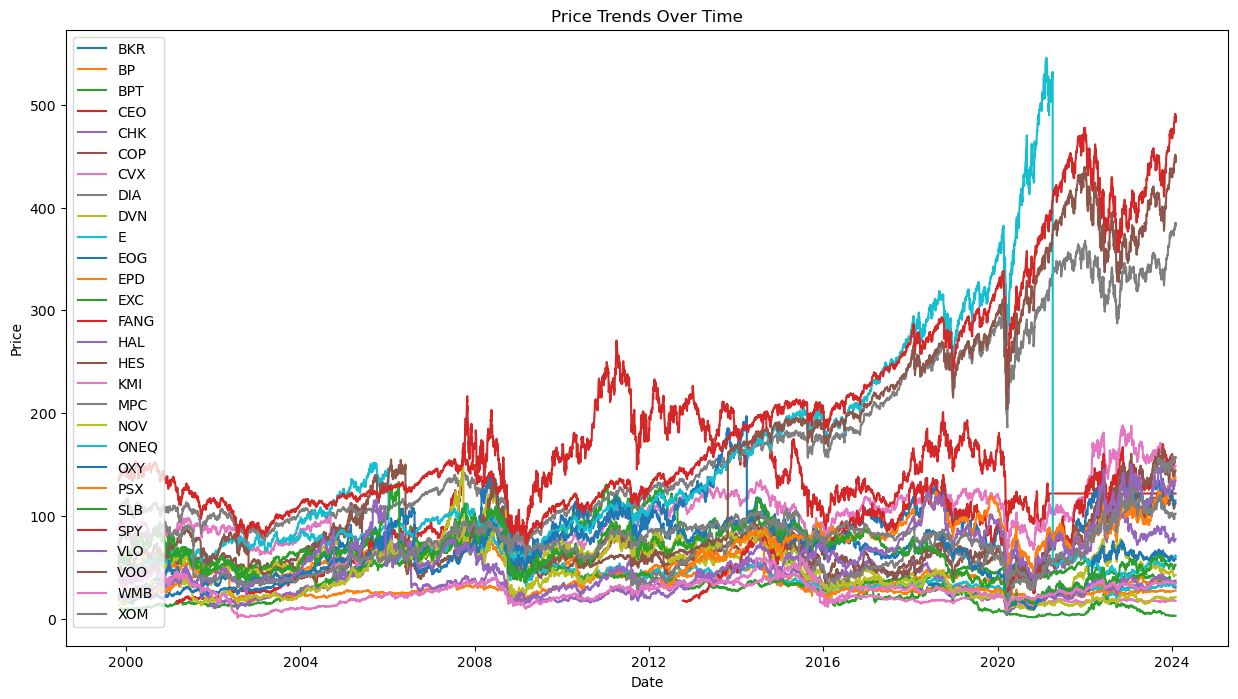

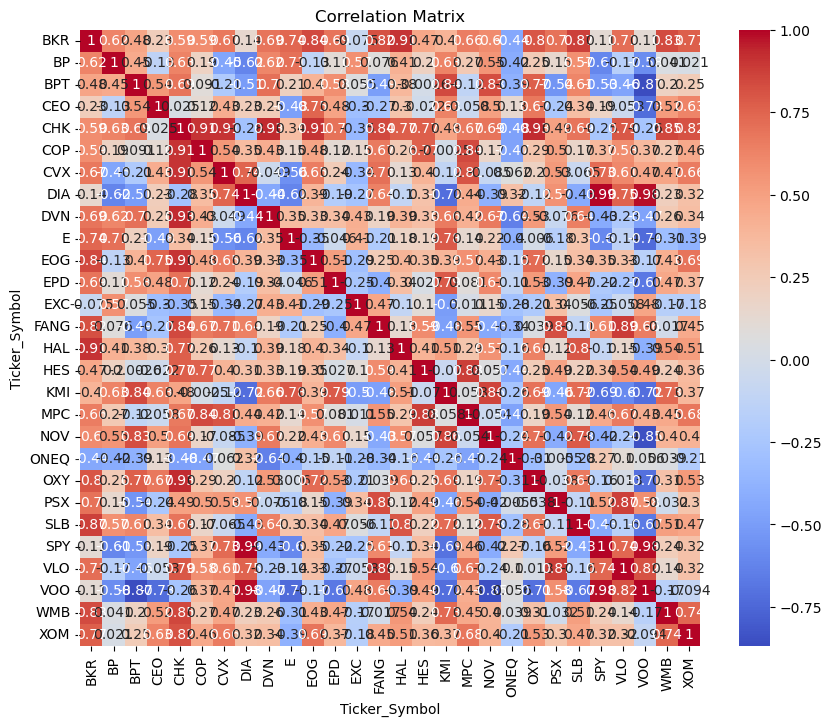

Summary Statistics:
       Gasoline_All_Grades_All_Formulations_Retail_Gasoline_Prices_US  \
count                                        1252.000000                
mean                                            2.679427                
std                                             0.799854                
min                                             1.101000                
25%                                             2.104000                
50%                                             2.680500                
75%                                             3.353000                
max                                             5.107000                

       Gasoline_All_Grades_Conventional_Retail_Gasoline_Prices_US  \
count                                        1252.000000            
mean                                            2.608827            
std                                             0.779981            
min                                           

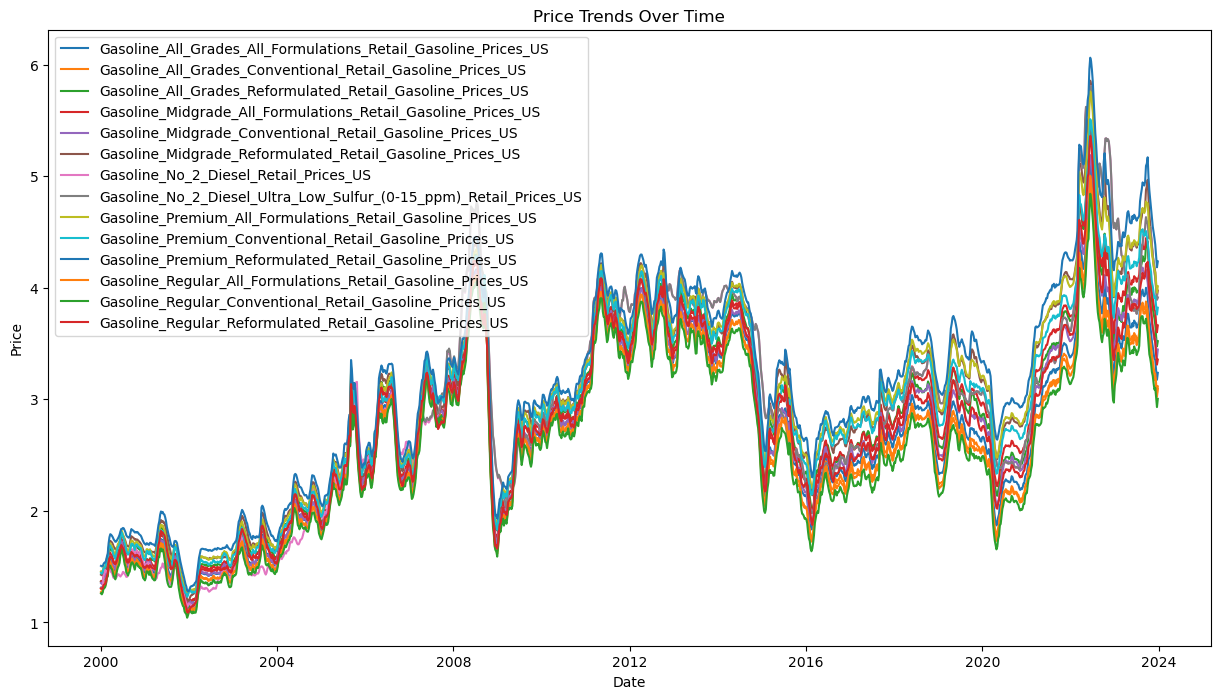

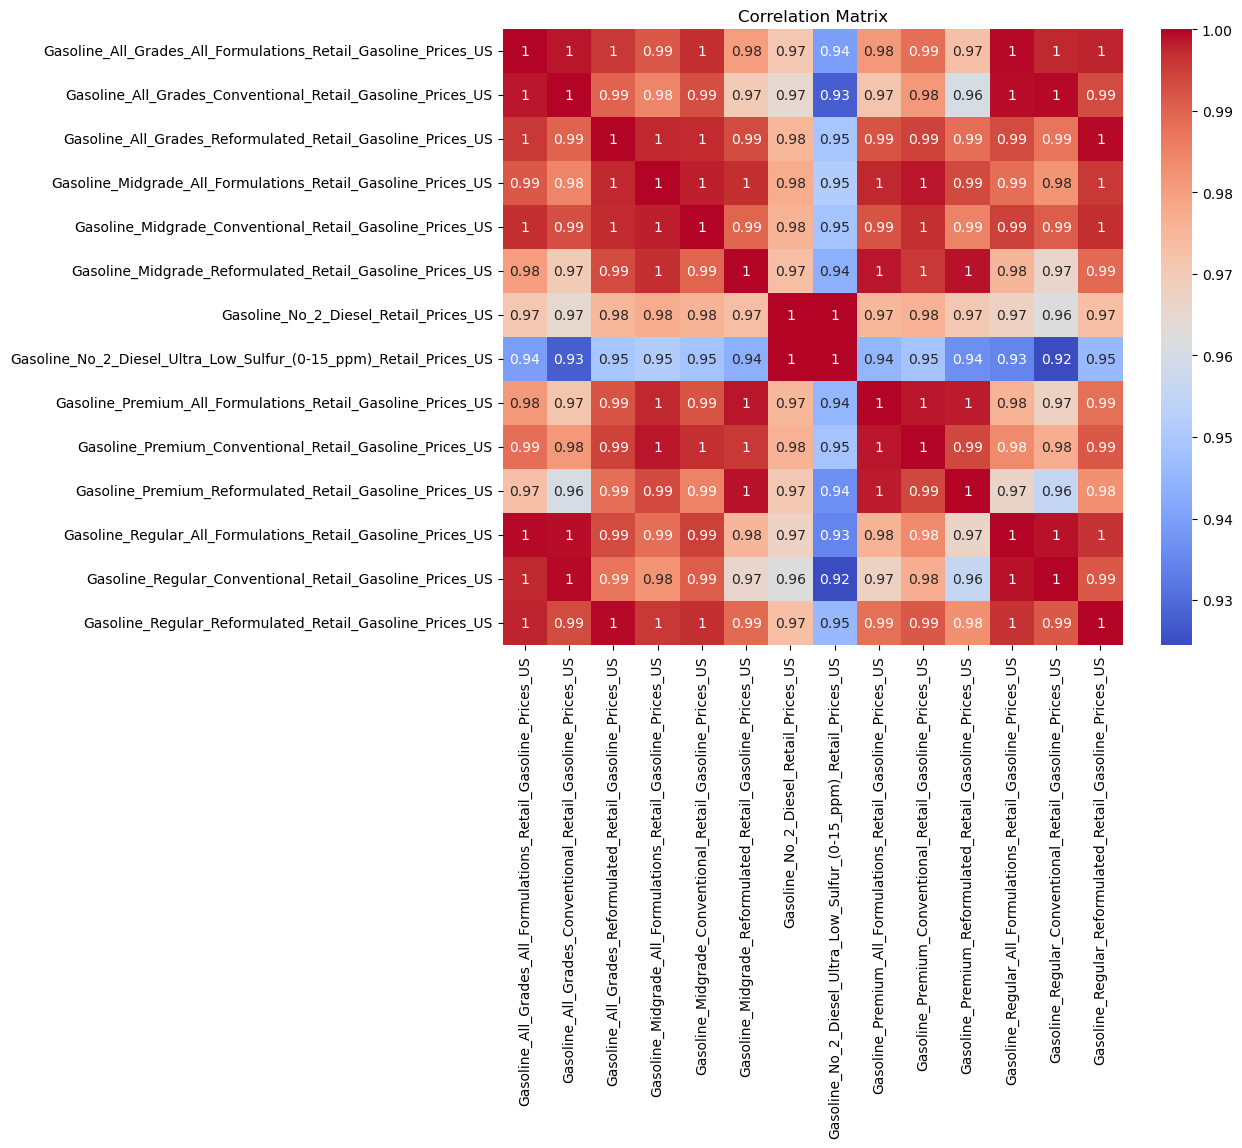

Summary Statistics:
       Gasoline_All_Grades_Conventional_Retail_Gasoline_Prices_Central_Atlantic_(PADD_1B)  \
count                                        1252.000000                                    
mean                                            2.760959                                    
std                                             0.820570                                    
min                                             1.149000                                    
25%                                             2.187500                                    
50%                                             2.774000                                    
75%                                             3.508250                                    
max                                             5.037000                                    

       Gasoline_All_Grades_Conventional_Retail_Gasoline_Prices_Cleveland  \
count                                        1075.000000          

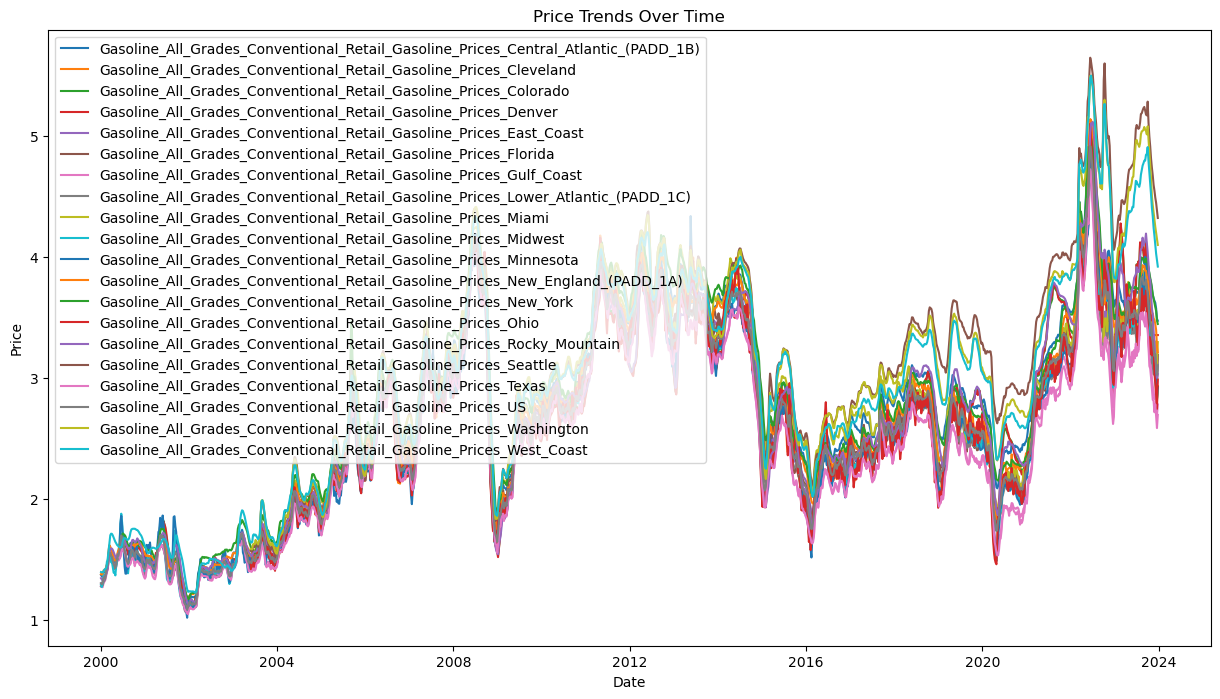

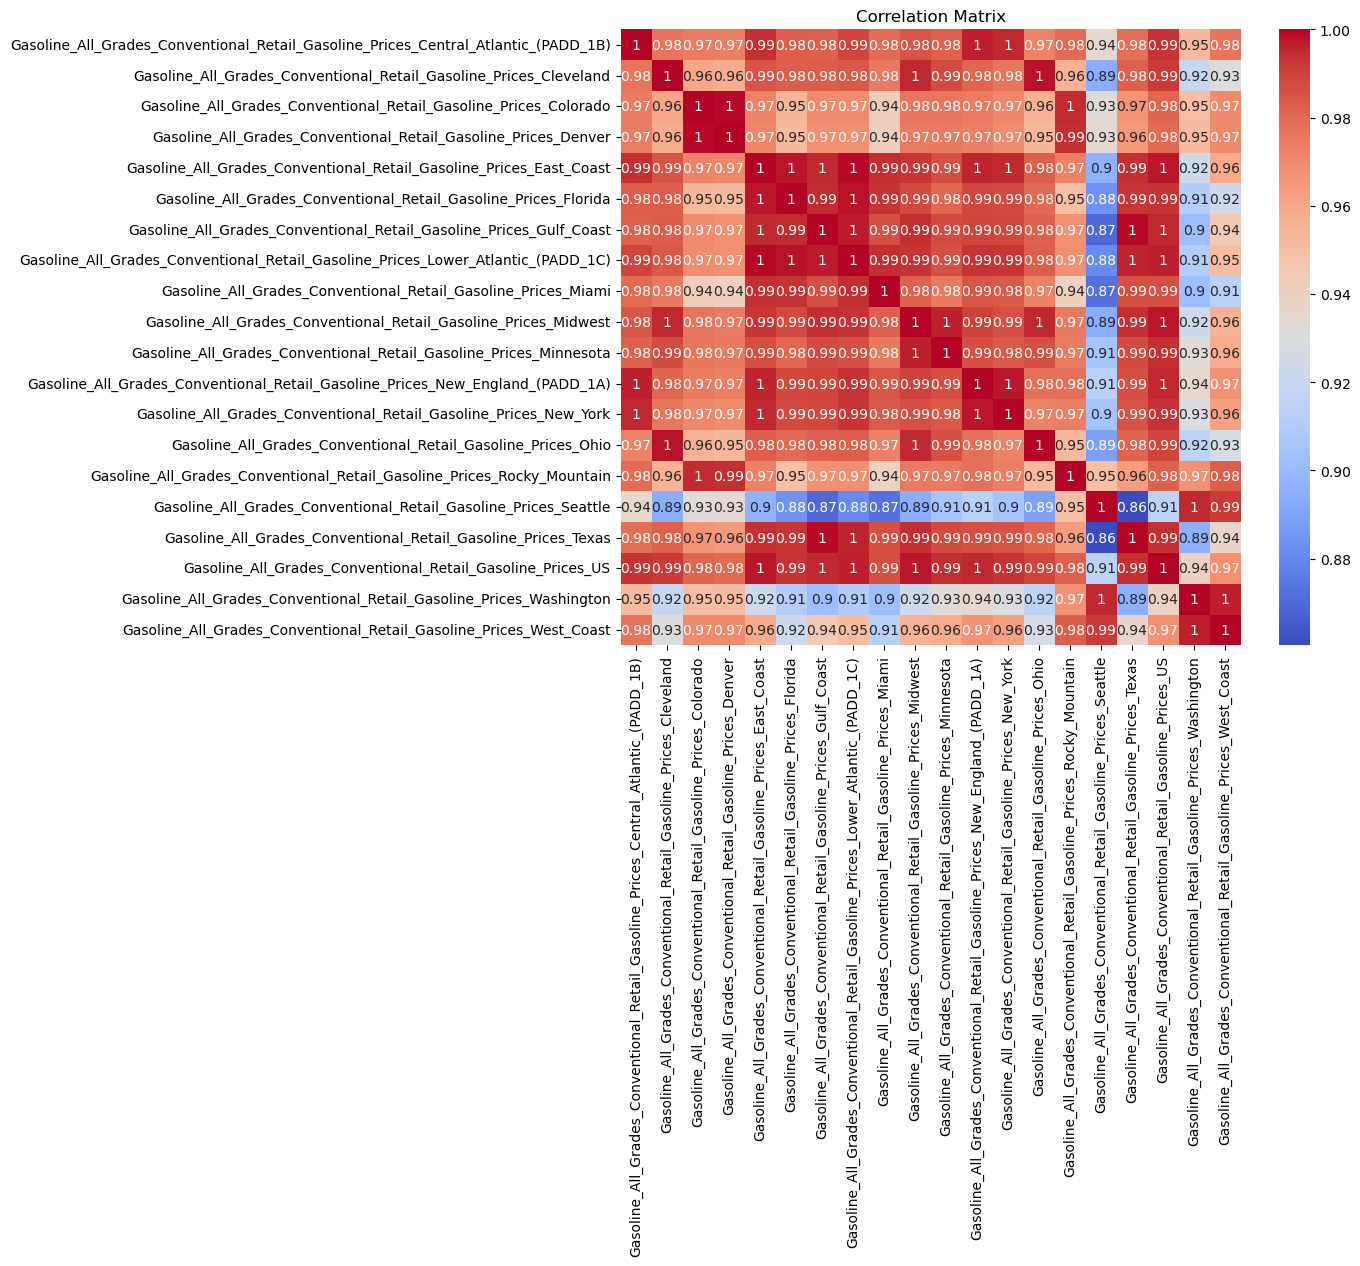

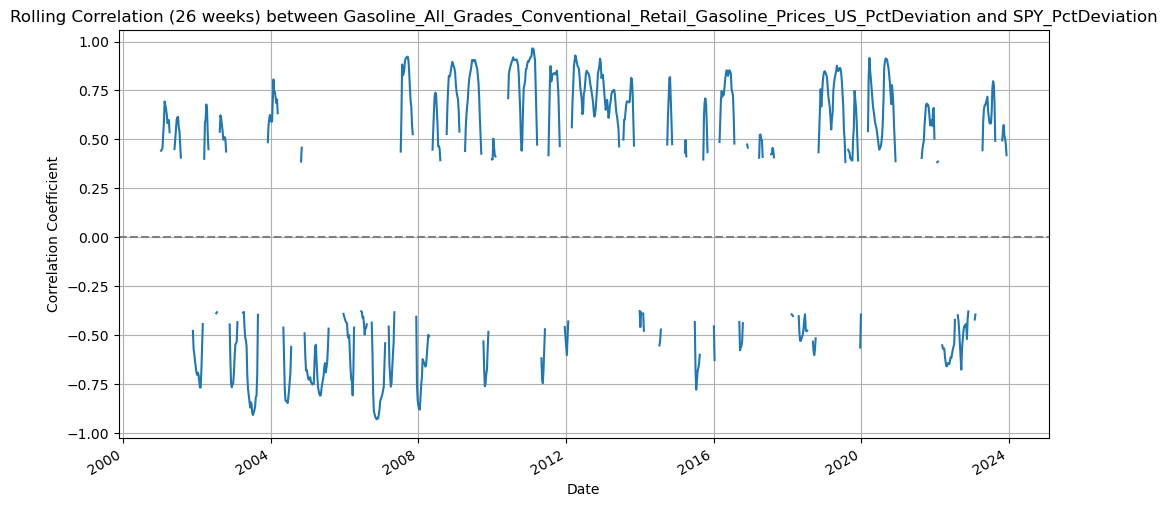

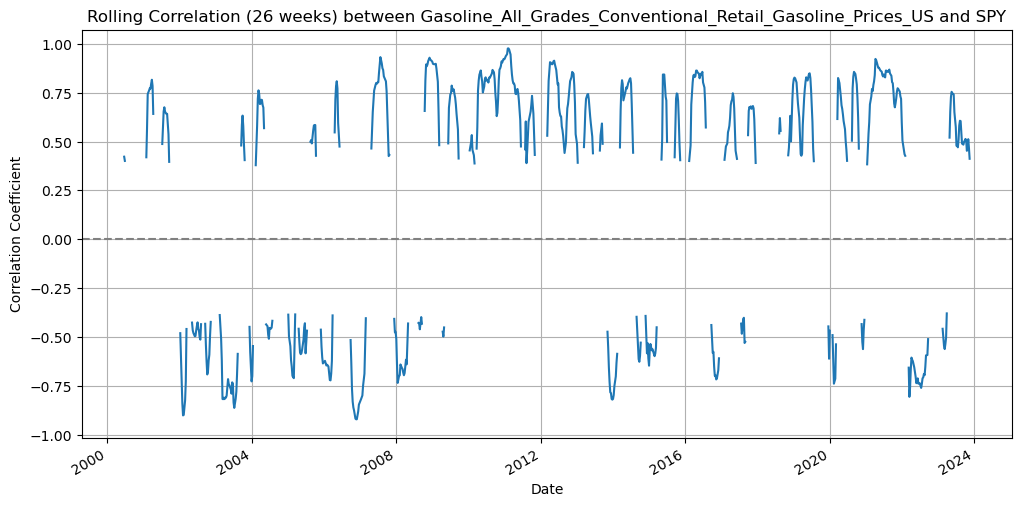

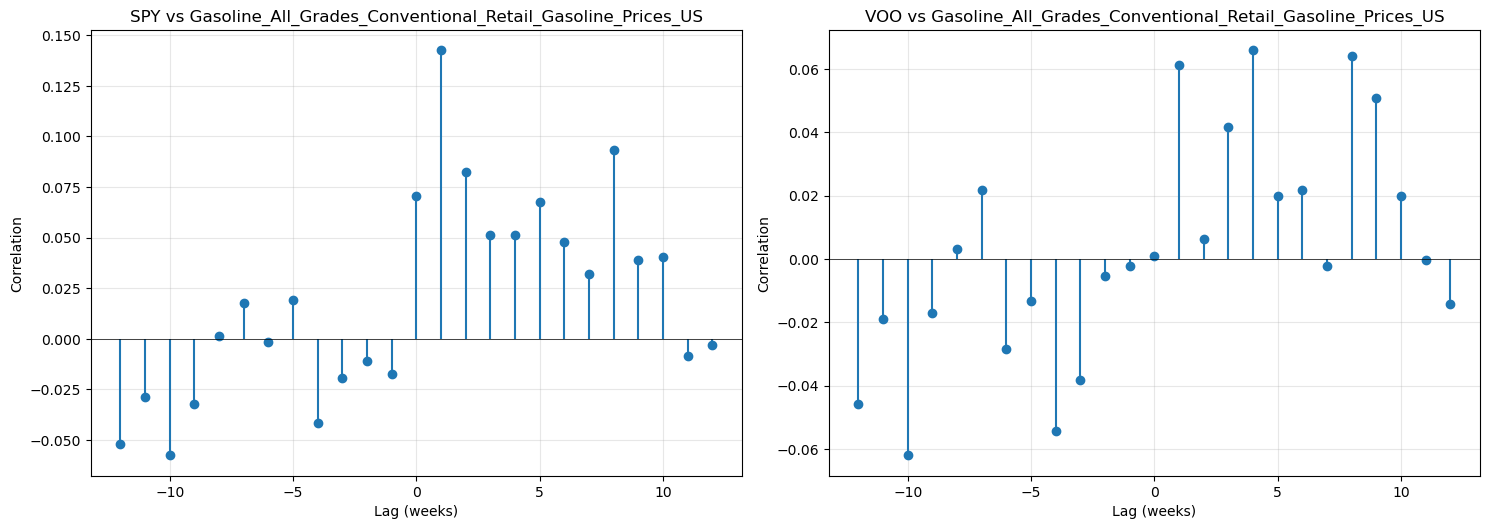


Granger Causality: Does Gasoline_All_Grades_Conventional_Retail_Gasoline_Prices_US predict SPY?
   Lag  p-value
0    1   0.0019
1    2   0.0060
2    3   0.0159
3    4   0.0212
4    5   0.0172
Significant at lag 1 (p < 0.05)

Granger Causality: Does Gasoline_All_Grades_Conventional_Retail_Gasoline_Prices_US predict VOO?
   Lag  p-value
0    1   0.0795
1    2   0.1653
2    3   0.1833
3    4   0.1543
4    5   0.2243
No significant predictive relationship found

Regression Results for SPY at lag 1:
                            OLS Regression Results                            
Dep. Variable:             SPY_Return   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.1895
Date:                Sat, 17 May 2025   Prob (F-statistic):              0.663
Time:                        15:28:39   Log-Likelihood:                 1419.3
No. Observations:        

C:\Users\grace\anaconda3\Lib\site-packages\statsmodels\tsa\stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
C:\Users\grace\anaconda3\Lib\site-packages\statsmodels\tsa\stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
C:\Users\grace\anaconda3\Lib\site-packages\statsmodels\tsa\stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(


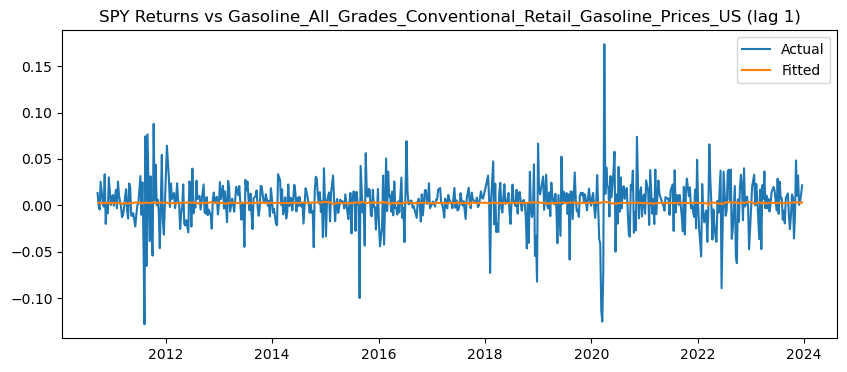

C:\Users\grace\anaconda3\Lib\site-packages\statsmodels\tsa\stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(


In [71]:
import numpy as np

def cross_correlation_analysis(series_x, series_y, max_lag=12):
    """
    Calculate cross-correlations between two series at multiple lags

    Parameters:
    series_x (pd.Series): First time series (e.g., gasoline returns)
    series_y (pd.Series): Second time series (e.g., stock returns)
    max_lag (int): Maximum number of lags to test in both directions

    Returns:
    pd.DataFrame: Contains correlations at each lag period
    """
    results = []

    # Calculate correlations for both positive and negative lags
    for lag in range(-max_lag, max_lag+1):
        if lag < 0:
            # When lag is negative, shift series_x (gasoline) forward
            corr = series_x.shift(-lag).corr(series_y)
        else:
            # When lag is positive, shift series_y (stocks) forward
            corr = series_x.corr(series_y.shift(lag))

        results.append({
            'Lag': lag,
            'Correlation': corr,
            'Absolute_Correlation': abs(corr)
        })
    results_final = pd.DataFrame(results).sort_values('Absolute_Correlation', ascending=False)
    return results_final


%run Untitled.ipynb


In [72]:
def clean_gold_data(file_path):
    df = pd.read_csv(file_path, sep=';', parse_dates=['timestamp'], usecols=['timestamp', 'close'])
    df.sort_values('timestamp', inplace=True)
    df.set_index('timestamp', inplace=True)
    df.ffill(inplace=True)
    return df

#data is from Kaggle 
# https://www.kaggle.com/datasets/romanfonel/precious-metals-history-since-2000-with-news
gold_df = clean_gold_data('final_gold_data.csv')

commodities_df = clean_and_organize_data('all_commodities.csv','Date_Time','Commodity_Simple','Value')


In [73]:
gold_df.head()

,close
timestamp,
2000-08-30,273.9
2000-08-31,278.3
2000-09-01,277.0
2000-09-05,275.8
2000-09-06,274.2


In [74]:
gasoline_df.head()

,Gasoline_All_Grades_All_Formulations_Retail_Gasoline_Prices_Boston,Gasoline_All_Grades_All_Formulations_Retail_Gasoline_Prices_California,Gasoline_All_Grades_All_Formulations_Retail_Gasoline_Prices_Central_Atlantic_(PADD_1B),Gasoline_All_Grades_All_Formulations_Retail_Gasoline_Prices_Chicago,Gasoline_All_Grades_All_Formulations_Retail_Gasoline_Prices_Cleveland,Gasoline_All_Grades_All_Formulations_Retail_Gasoline_Prices_Colorado,Gasoline_All_Grades_All_Formulations_Retail_Gasoline_Prices_Denver,Gasoline_All_Grades_All_Formulations_Retail_Gasoline_Prices_East_Coast,Gasoline_All_Grades_All_Formulations_Retail_Gasoline_Prices_Florida,Gasoline_All_Grades_All_Formulations_Retail_Gasoline_Prices_Gulf_Coast,...,Gasoline_Regular_Reformulated_Retail_Gasoline_Prices_Massachusetts,Gasoline_Regular_Reformulated_Retail_Gasoline_Prices_Midwest,Gasoline_Regular_Reformulated_Retail_Gasoline_Prices_New_England_(PADD_1A),Gasoline_Regular_Reformulated_Retail_Gasoline_Prices_New_York,Gasoline_Regular_Reformulated_Retail_Gasoline_Prices_New_York_Harbor,Gasoline_Regular_Reformulated_Retail_Gasoline_Prices_Rocky_Mountain,Gasoline_Regular_Reformulated_Retail_Gasoline_Prices_San_Francisco,Gasoline_Regular_Reformulated_Retail_Gasoline_Prices_Texas,Gasoline_Regular_Reformulated_Retail_Gasoline_Prices_US,Gasoline_Regular_Reformulated_Retail_Gasoline_Prices_West_Coast
Date,,,,,,,,,,,,,,,,,,,,,
2000-01-03,NaN,NaN,1.366,NaN,NaN,NaN,NaN,1.314,NaN,1.271,...,NaN,1.272,1.351,NaN,NaN,NaN,NaN,NaN,1.306,1.357
2000-01-10,NaN,NaN,1.358,NaN,NaN,NaN,NaN,1.315,NaN,1.265,...,NaN,1.261,1.352,NaN,NaN,NaN,NaN,NaN,1.301,1.352
2000-01-17,NaN,NaN,1.358,NaN,NaN,NaN,NaN,1.316,NaN,1.265,...,NaN,1.288,1.344,NaN,NaN,NaN,NaN,NaN,1.303,1.343
2000-01-24,NaN,NaN,1.381,NaN,NaN,NaN,NaN,1.342,NaN,1.296,...,NaN,1.377,1.369,NaN,NaN,NaN,NaN,NaN,1.335,1.345
2000-01-31,NaN,NaN,1.386,NaN,NaN,NaN,NaN,1.348,NaN,1.305,...,NaN,1.349,1.370,NaN,NaN,NaN,NaN,NaN,1.340,1.379


In [75]:
commodities_df.head()

Commodity_Simple,BRENT,NATURAL_GAS,WTI
Date_Time,,,
1986-01-02,NaN,NaN,25.56
1986-01-03,NaN,NaN,26.00
1986-01-06,NaN,NaN,26.53
1986-01-07,NaN,NaN,25.85
1986-01-08,NaN,NaN,25.87


Summary Statistics:
             close
count  6177.000000
mean   1181.012304
std     606.424369
min     255.100000
25%     635.200000
50%    1238.400000
75%    1640.300000
max    3222.200000


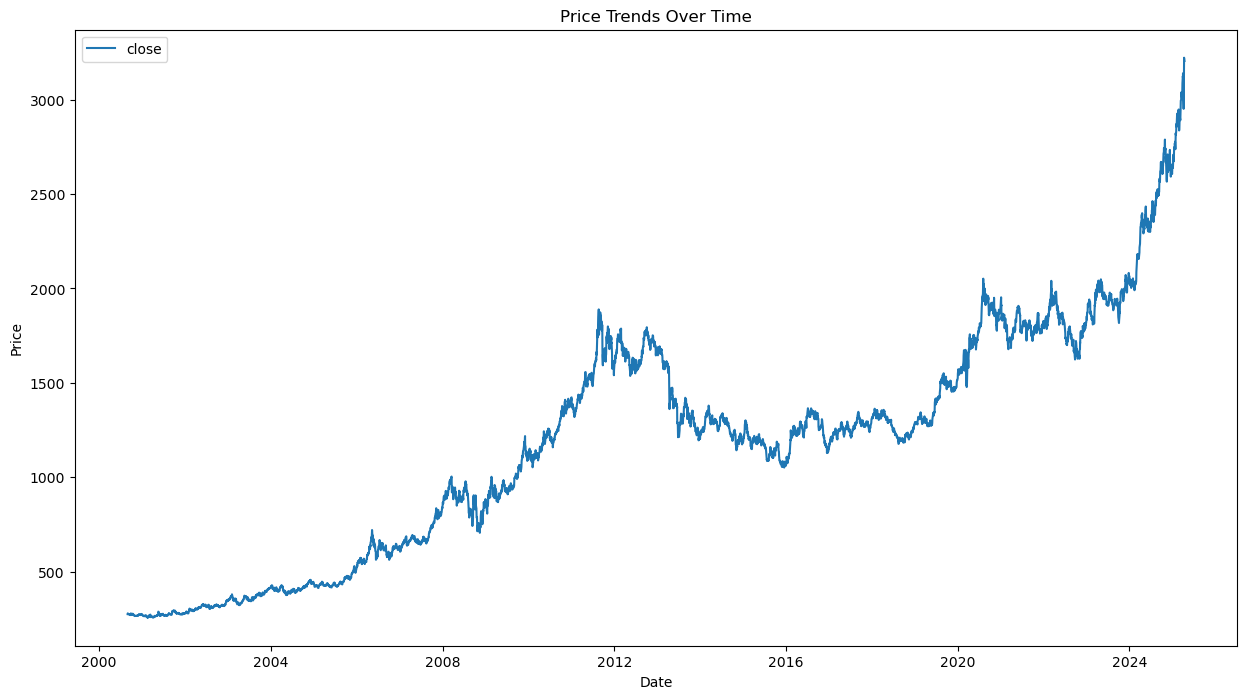

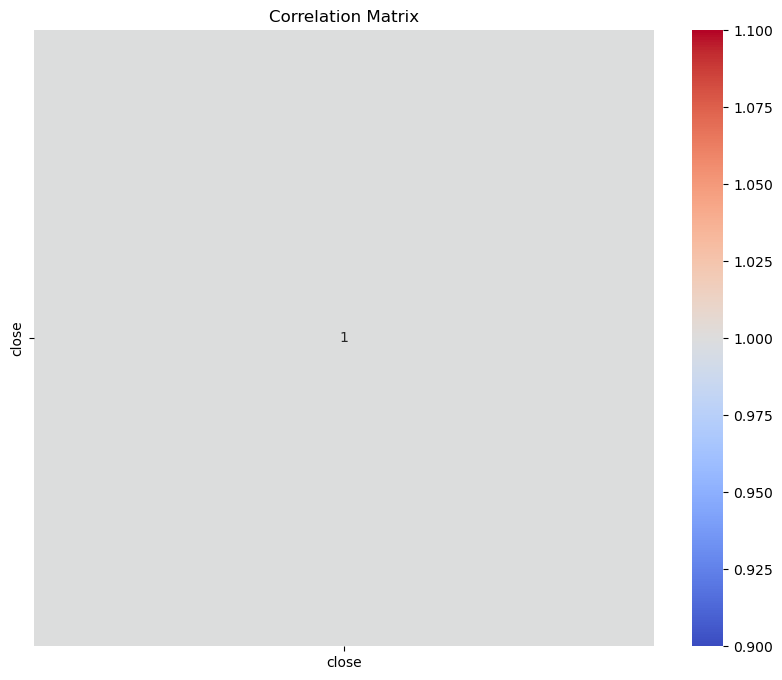

In [76]:
perform_eda(gold_df)

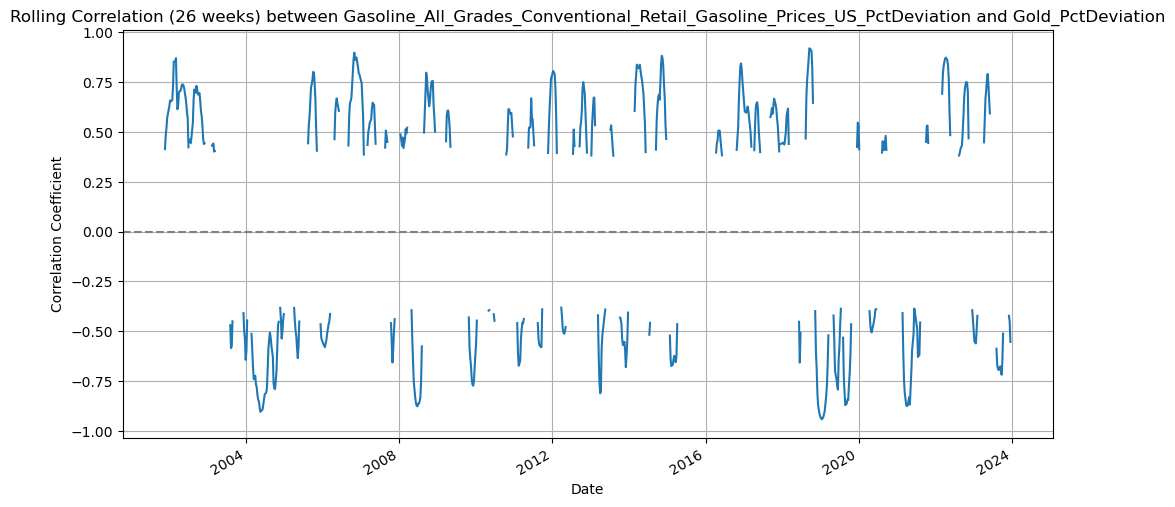

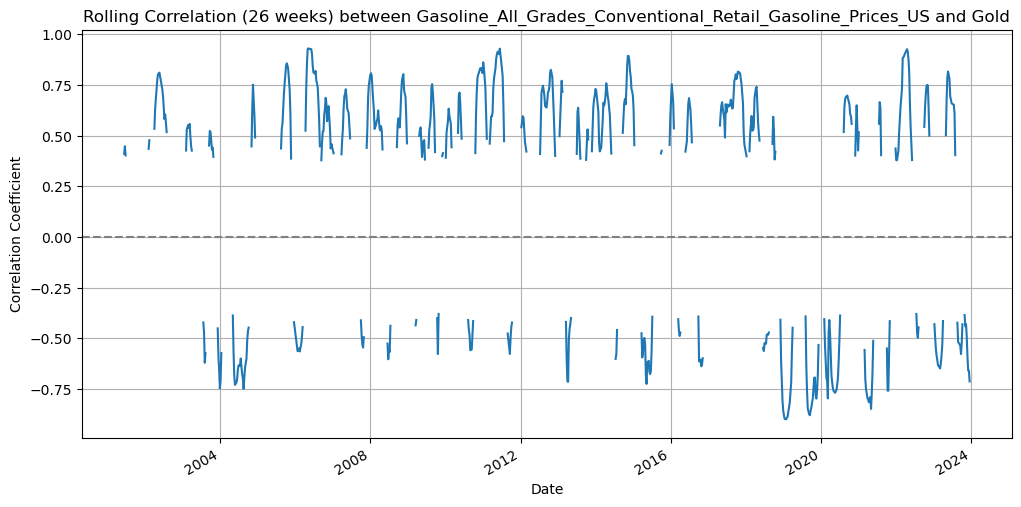

2000-09-11         NaN
2000-09-18         NaN
2000-09-25         NaN
2000-10-02         NaN
2000-10-09         NaN
                ...   
2023-11-20   -0.492715
2023-11-27   -0.591282
2023-12-04   -0.659222
2023-12-11   -0.660340
2023-12-18   -0.713031
Length: 1095, dtype: float64

In [77]:
gold_df.rename(columns={'close': 'Gold', 'timestamp': 'Date'}, inplace=True)

merged2_df = pd.merge(gasoline_df, gold_df, left_index=True, right_index=True, how='inner')

col = 'Gasoline_All_Grades_Conventional_Retail_Gasoline_Prices_US'
window = 30

rolling_avg = merged2_df[col].rolling(window=window).mean()
merged2_df[f'{col}_Deviation'] = merged2_df[col] - rolling_avg
merged2_df[f'{col}_PctDeviation'] = (merged2_df[col] - rolling_avg) / rolling_avg * 100

col_2 = 'Gold'

rolling_avg = merged2_df[col_2].rolling(window=window).mean()
merged2_df[f'{col_2}_Deviation'] = merged2_df[col_2] - rolling_avg
merged2_df[f'{col_2}_PctDeviation'] = (merged2_df[col_2] - rolling_avg) / rolling_avg * 100

calculate_rolling_correlation(merged2_df, col + '_PctDeviation', 'Gold_PctDeviation', window=20, min_periods=10)
calculate_rolling_correlation(merged2_df, col, 'Gold', window=20, min_periods=10)


In [85]:
gold_weekly = gold_df.resample('W-MON').mean()
gold_weekly.head()



,Gold
timestamp,
2000-09-04,276.40
2000-09-11,274.08
2000-09-18,272.36
2000-09-25,271.42
2000-10-02,274.92


In [87]:
combined_df = pd.merge(
    gold_weekly[['Gold']],
    gasoline_df[[col]],
    left_index=True,
    right_index=True,
    how='inner'
)
combined_df.ffill(inplace=True)
combined_df.head()
# print(gasoline_df[col])
# print( gold_weekly[['Gold']])


,Gold,Gasoline_All_Grades_Conventional_Retail_Gasoline_Prices_US
2000-09-04,276.40,1.539
2000-09-11,274.08,1.571
2000-09-18,272.36,1.575
2000-09-25,271.42,1.562
2000-10-02,274.92,1.536


In [89]:
returns_df = combined_df.pct_change().dropna()
returns_df.columns = ['Gold_Return', 'Gasoline_Return']

gc_results = run_granger_tests(returns_df, 'Gold_Return', 'Gasoline_Return', 12)
print(gc_results)

if any(gc_results['p-value'] < 0.05):
    best_lag = gc_results.loc[gc_results['p-value'].idxmin(), 'Lag']
    print(f"\nGold Granger-causes Gasoline at lag {best_lag}")
else:
    print("\nNo significant Granger causality found from Gold to Gasoline")

gc_results_reverse = run_granger_tests(returns_df, 'Gasoline_Return', 'Gold_Return', 12)
print(gc_results_reverse)

if any(gc_results_reverse['p-value'] < 0.05):
    best_lag_rev = gc_results_reverse.loc[gc_results_reverse['p-value'].idxmin(), 'Lag']
    print(f"\nGasoline Granger-causes Gold at lag {best_lag_rev}")
else:
    print("\nNo significant Granger causality found from Gasoline to Gold")


C:\Users\grace\anaconda3\Lib\site-packages\statsmodels\tsa\stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(


    Lag  p-value
0     1   0.5135
1     2   0.6759
2     3   0.6345
3     4   0.7101
4     5   0.8711
5     6   0.8187
6     7   0.7209
7     8   0.7695
8     9   0.1593
9    10   0.1885
10   11   0.1942
11   12   0.0939

No significant Granger causality found from Gold to Gasoline


C:\Users\grace\anaconda3\Lib\site-packages\statsmodels\tsa\stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(


    Lag  p-value
0     1   0.2166
1     2   0.2121
2     3   0.3288
3     4   0.4912
4     5   0.6010
5     6   0.2003
6     7   0.2107
7     8   0.2096
8     9   0.3006
9    10   0.3748
10   11   0.3709
11   12   0.4242

No significant Granger causality found from Gasoline to Gold
